In [1]:
# Analysis Section

In [2]:
#Dpendencies and setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combined_Mousedf = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
Combined_Mousedf.head(30)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
Mouse_count = Combined_Mousedf["Mouse ID"].unique()
Mouse_count = len(Mouse_count)
Mouse_count

249

In [4]:
print(Combined_Mousedf.dtypes)

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object


In [5]:
#Find the dup Mouse ID & Timepoint
Test = Combined_Mousedf[Combined_Mousedf.duplicated(
    subset =['Mouse ID', 'Timepoint'],
    keep = 'last' )]
print("Duplicated Rows :")
Test

Duplicated Rows :


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [6]:
#Drop the bad Data (Mouse ID g989)

CleanedDF = Combined_Mousedf[Combined_Mousedf["Mouse ID"].str.contains("g989")==False]
CleanedDF.head(15)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
print(CleanedDF.dtypes)

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object


In [8]:
#Test to see if mouse count changed.
Mouse_count2 = CleanedDF["Mouse ID"].unique()
Mouse_count2 = len(Mouse_count2)
Mouse_count2

248

In [9]:
#Find average tumor size per drug
DrugMean = CleanedDF.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(["Drug Regimen"]).mean()
DrugMean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Find median tumor size per drug
DrugMedian = CleanedDF.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(["Drug Regimen"]).median()
DrugMedian

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Find tumor size per drug variance
DrugVar = CleanedDF.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(["Drug Regimen"]).var()
DrugVar

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Find number of test performed per drug to graph
DrugStdDev = CleanedDF.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(["Drug Regimen"]).std()
DrugStdDev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Find tumor size per drug Std. Dev. Error
DrugStdDev_Error = CleanedDF.set_index(["Drug Regimen"])["Tumor Volume (mm3)"].groupby(["Drug Regimen"]).sem()
DrugStdDev_Error


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [14]:
#Combine above variables into a viewable dataframe
Drug_Summary = pd.DataFrame({
    "Mean Tumor Volume": DrugMean,
    "Median Tumor Volume": DrugMedian,
    "Variance Tumor Volume": DrugVar,
    "Std. Dev. Tumor Volume": DrugStdDev,
    "Std. Dev. Error Tumor Volume": DrugStdDev_Error
})
#style.set_properties(**{'text-align':'middle'})

Drug_Summary.style.set_properties(**{'text-align':'middle'})


,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Std. Dev. Tumor Volume,Std. Dev. Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


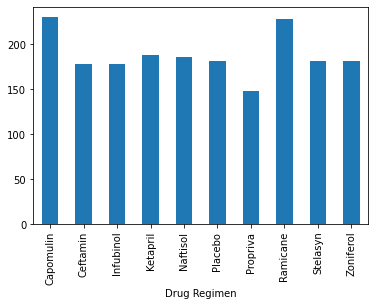

In [15]:
#Count the number of mice tested per drug
TestsPerDrug_Pandas = CleanedDF.set_index(["Drug Regimen"])["Timepoint"].groupby(["Drug Regimen"]).count()
TestsPerDrug_Pandas.plot(kind='bar')

<BarContainer object of 10 artists>

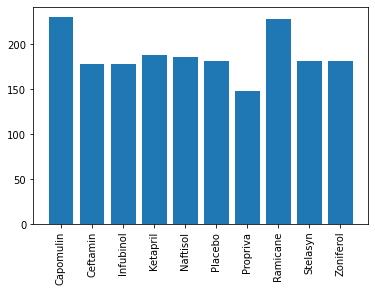

In [16]:
TestsPerDrug_Mat = CleanedDF.set_index(["Drug Regimen"])["Timepoint"].groupby(["Drug Regimen"]).count()
DrugNames = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
x_axis = np.arange(len(DrugNames))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, DrugNames,rotation='vertical')
plt.bar(x_axis,TestsPerDrug_Mat)

In [17]:
#find numer of female vs male mice
M_Gender = CleanedDF.groupby(["Sex"]).count() 
M_Gender

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,922,922,922,922,922,922,922
Male,958,958,958,958,958,958,958


([<matplotlib.patches.Wedge at 0x1707d09c518>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

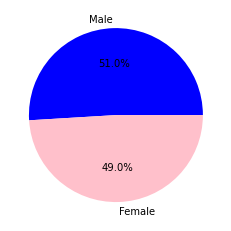

In [18]:
#Make Pie Chart using matplotlib
Labels = ["Male", "Female"]
Size = [958,922]
Colors = ["Blue", "Pink"]

plt.pie(Size, labels=Labels, colors=Colors, autopct="%1.1f%%")

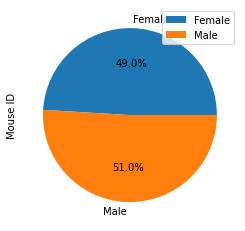

In [19]:
#Make Pie Chart using pandas 
M_Gender = CleanedDF.groupby(["Sex"]).count().plot(kind='pie', y='Mouse ID', autopct="%1.1f%%" )


In [20]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:
#Capomulin, Ramicane, Infubinol, and Ceftamin.

LastTumorVol =CleanedDF.drop_duplicates(subset=['Mouse ID'], keep='last')
LastTumorVol


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [21]:
CapomulinVol = LastTumorVol.loc[LastTumorVol['Drug Regimen'] == 'Capomulin'].drop(columns = ['Mouse ID','Sex',
                                                                                   'Age_months',
                                                                                   'Weight (g)',
                                                                                   'Timepoint',
                                                                                   'Metastatic Sites'])

CapomulinVol

,Drug Regimen,Tumor Volume (mm3)
19,Capomulin,23.343598
29,Capomulin,28.484033
39,Capomulin,28.430964
64,Capomulin,30.485985
104,Capomulin,31.023923
124,Capomulin,31.896238
134,Capomulin,32.377357
144,Capomulin,33.329098
164,Capomulin,34.455298
204,Capomulin,37.311846


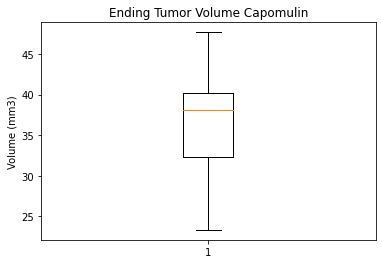

In [22]:
Cvol = CapomulinVol['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Ending Tumor Volume Capomulin')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(Cvol)
plt.show()

In [23]:
RamicaneVol = LastTumorVol.loc[LastTumorVol['Drug Regimen'] == 'Ramicane'].drop(columns = ['Mouse ID','Sex',
                                                                                   'Age_months',
                                                                                   'Weight (g)',
                                                                                   'Timepoint',
                                                                                   'Metastatic Sites'])
 
RamicaneVol

,Drug Regimen,Tumor Volume (mm3)
9,Ramicane,22.050126
49,Ramicane,29.128472
59,Ramicane,30.276232
74,Ramicane,30.564625
84,Ramicane,30.638696
94,Ramicane,31.560470
114,Ramicane,31.095335
154,Ramicane,33.397653
174,Ramicane,32.978522
184,Ramicane,33.562402


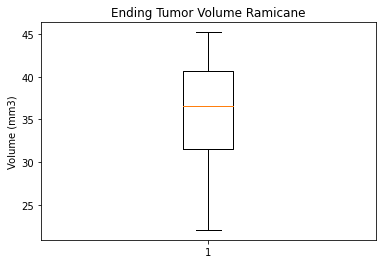

In [24]:
Rvol = RamicaneVol['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Ending Tumor Volume Ramicane')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(Rvol)
plt.show()

In [25]:
InfubinolVol = LastTumorVol.loc[LastTumorVol['Drug Regimen'] == 'Infubinol'].drop(columns = ['Mouse ID','Sex',
                                                                                   'Age_months',
                                                                                   'Weight (g)',
                                                                                   'Timepoint',
                                                                                   'Metastatic Sites'])
 
InfubinolVol

,Drug Regimen,Tumor Volume (mm3)
463,Infubinol,67.973419
473,Infubinol,65.525743
530,Infubinol,57.031862
540,Infubinol,66.083066
637,Infubinol,72.226731
669,Infubinol,36.321346
742,Infubinol,60.969711
800,Infubinol,62.435404
834,Infubinol,60.918767
949,Infubinol,67.289621


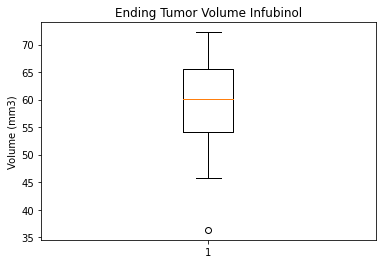

In [26]:
Ivol = InfubinolVol['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Ending Tumor Volume Infubinol')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot(Ivol)
plt.show()

In [27]:
CeftaminVol = LastTumorVol.loc[LastTumorVol['Drug Regimen'] == 'Ceftamin'].drop(columns = ['Mouse ID','Sex',
                                                                                   'Age_months',
                                                                                   'Weight (g)',
                                                                                   'Timepoint',
                                                                                   'Metastatic Sites'])
 
CeftaminVol

,Drug Regimen,Tumor Volume (mm3)
493,Ceftamin,62.999356
594,Ceftamin,45.000000
600,Ceftamin,56.057749
617,Ceftamin,55.742829
840,Ceftamin,48.722078
940,Ceftamin,47.784682
993,Ceftamin,61.849023
1033,Ceftamin,68.923185
1112,Ceftamin,67.748662
1119,Ceftamin,57.918381


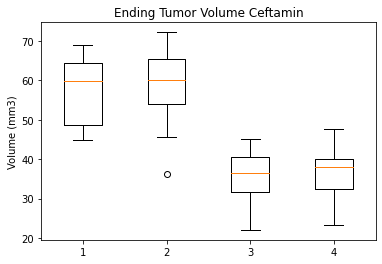

In [28]:
Cefvol = CeftaminVol['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('Ending Tumor Volume Ceftamin')
ax1.set_ylabel('Volume (mm3)')
ax1.boxplot([Cefvol, Ivol, Rvol, Cvol])
plt.show()

In [29]:
#Select a mouse that was treated with Capomulin, and generate a line plot of tumor volume versus time point for that mouse

#First get mouse
CapomulinMouse = CleanedDF.loc[CleanedDF['Mouse ID'] == 's185']
CpMouseTimeVSize = CapomulinMouse.drop(columns=['Drug Regimen',
                                 'Sex',
                                 'Age_months',
                                 'Weight (g)',
                                 'Metastatic Sites',
                                               ])
CpMouseTimeVSize.set_index(['Timepoint'])['Tumor Volume (mm3)']

Timepoint
0     45.000000
5     43.878496
10    37.614948
15    38.177232
20    36.866876
25    33.949940
30    32.959671
35    28.328531
40    25.472143
45    23.343598
Name: Tumor Volume (mm3), dtype: float64

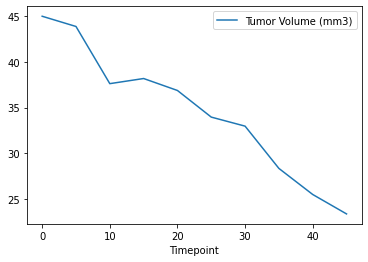

In [30]:
#plot mouse s185
CpMouseTimeVSize.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)')

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
CapomulinMice = CleanedDF.loc[CleanedDF['Drug Regimen'] == 'Capomulin']
CpMiceTVvsMW = CapomulinMice.drop(columns=[
#                                              'Mouse ID',
                                             'Drug Regimen',
                                             'Sex',
                                             'Age_months',
                                             'Timepoint',
                                             'Metastatic Sites',
                                               ])
CpMiceTVvsMW.head(60)

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
15,s185,17,33.949940
16,s185,17,32.959671
17,s185,17,28.328531
18,s185,17,25.472143
19,s185,17,23.343598


In [32]:
CpMiceTVvsMW_mean = CpMiceTVvsMW.groupby(['Mouse ID']).mean()
CpMiceTVvsMW_mean


,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


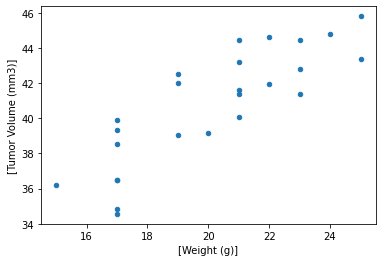

In [33]:
#Do a scatter plot with the weight vs tumor volume data above 
CpMiceTVvsMW_mean.plot.scatter(x=['Weight (g)'], y=['Tumor Volume (mm3)'])




In [34]:
#make data usable for calculation 
x_values = CpMiceTVvsMW_mean['Weight (g)'].reset_index()
x_values = x_values.drop(columns=['Mouse ID'])
x = x_values.squeeze()
x

0     22
1     21
2     17
3     19
4     22
5     24
6     20
7     23
8     21
9     21
10    19
11    17
12    19
13    25
14    17
15    25
16    17
17    23
18    17
19    17
20    21
21    23
22    21
23    15
24    17
Name: Weight (g), dtype: int64

In [35]:
y_values = CpMiceTVvsMW_mean['Tumor Volume (mm3)'].reset_index()
y_values = y_values.drop(columns=['Mouse ID'])
y = y_values.squeeze()
y

0     41.963636
1     40.083699
2     36.505973
3     41.990097
4     44.613344
5     44.805810
6     39.141053
7     44.465236
8     43.216925
9     44.434474
10    42.507261
11    34.847470
12    39.049816
13    45.798970
14    36.509212
15    43.367364
16    34.559143
17    42.803733
18    39.328725
19    39.887495
20    41.581595
21    41.384825
22    41.352452
23    36.182040
24    38.506829
Name: Tumor Volume (mm3), dtype: float64

In [36]:
correlation = stats.pearsonr(x,y)


The correlation between Mouse weight and the average tumor volume is 0.84


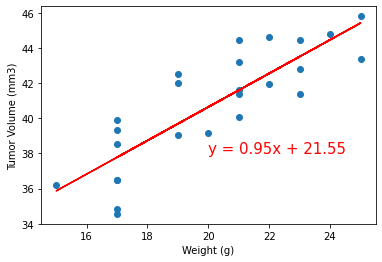

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept #List of predicted y values
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #Get string of lin regression line
plt.scatter(x,y)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red") #add in regression equation
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between Mouse weight and the average tumor volume is {round(correlation[0],2)}")
